In [79]:
import cv2
import matplotlib.pyplot as plt
import dlib
import numpy as np

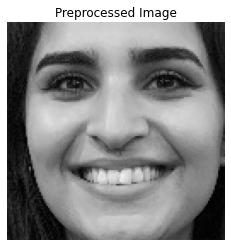

1/1 [==============================] - 0s 280ms/step
Predicted class: surprise


In [100]:
import cv2
import numpy as np
from keras.models import load_model

def preprocess_image(image_path):
    # Read the image using OpenCV
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (128, 128))
    # Normalize pixel values to be in the range [0, 1]
    img_normalized = img_resized / 255.0
    
    plt.imshow(img_normalized)
    plt.title('Preprocessed Image')
    plt.axis('off')
    plt.show()
    # Reshape the image to match the model's input shape and add batch dimension
    processed_img = np.expand_dims(img_normalized, axis=0)
    
    return processed_img

def predict_class(image_path, model):
    # Preprocess the input image
    processed_img = preprocess_image(image_path)
    
    # Get predictions from the model
    predictions = model.predict(processed_img)
    
    # Get the predicted class (index with highest probability)
    predicted_class = np.argmax(predictions, axis=1)
    
    return predicted_class

# Load the pre-trained model
model = load_model('our_data_model.h5')

# Test an image and get its predicted class
image_path = 'preprocessed/happiness/377291.jpg_face.jpg'
predicted_class = predict_class(image_path, model)
class_mapping = {
    0: 'anger',
    1: 'disgust',
    2: 'fear',
    3: 'happiness',
    4:'neutral',
    5:'sadness',
    6:'surprise'
}
# Extract the predicted class index (single element in the array)
predicted_class_index = predicted_class[0]

# Get the predicted class label
predicted_class_label = class_mapping[predicted_class_index]

print("Predicted class:", predicted_class_label)
